In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir, mkdir
from scipy.stats import norm

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
twomass_dir = join(root_data_dir, "TWOMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

In [3]:
name = "Completeness"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in gaia dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [4]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-004-005.hdf5']

In [5]:
tmass = vaex.open_many(twomass_files)
tmass["JK"] = tmass["Jmag"] - tmass["Kmag"]
tmass = tmass.extract()
tmass

#,ra,dec,Jmag,Kmag,designation,JK
0,0.000464,-84.272873,12.869,12.374,00000011-8416223,0.49500084
1,0.001247,-82.041222,12.825,12.156,00000029-8202283,0.6689997
2,0.001998,-84.804314,12.523,11.93,00000047-8448155,0.59299946
3,0.002857,-84.718956,11.746,10.877,00000068-8443082,0.86900043
4,0.004052,-82.750267,13.333,12.872,00000097-8245009,0.46100044
...,...,...,...,...,...,...
"50,234,210",359.992232,81.593384,12.276,11.887,23595813+8135361,0.38899994
"50,234,211",359.992311,86.652588,13.491,13.03,23595815+8639093,0.46100044
"50,234,212",359.992988,81.013268,9.471,8.67,23595831+8100477,0.80099964
"50,234,213",359.99454,86.22448,13.406,13.128,23595868+8613281,0.27799988


In [10]:
# gc = SkyCoord(ra=tmass.ra.to_numpy()*u.degree, dec=tmass.dec.to_numpy()*u.degree, frame='icrs', equinox='J2000')
# tmass["l"] = gc.galactic.l.value*np.pi/180
# tmass["b"] = gc.galactic.b.value*np.pi/180
# tmass = tmass.extract()
# tmass

In [6]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [7]:
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.000464,-84.272873,12.869,12.374,4617686126396602368,3.6212091,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,14.117249,14.546528,13.5242605,304.44429715164756,-32.70355447144384,770.2898,746.2748,786.9589,0.2956,0.2926,0.2995,G,--,20.11541748046875,3.3252038955688477,gaia,5658.60498046875,4.6826171875,9.59814453125,0.0,gspphot,4.222599983215332,0.01830005645751953,0.026999950408935547,0.0,gspphot,-0.04019999876618385,0.005499999970197678,0.00860000029206276,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.001998,-84.804314,12.523,11.93,4617598371624860928,17.00417,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,14.117252,14.645076,13.433549,304.29624940743884,-32.18708166475209,nan,nan,nan,nan,nan,nan,K,--,-23.82164764404297,3.2447915077209473,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
2,0.002857,-84.718956,11.746,10.877,4617602769671367936,5.9807105,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,13.724135,14.456079,12.896074,304.31980747322217,-32.26998931504778,nan,nan,nan,nan,nan,nan,K,--,131.92237854003906,1.274144172668457,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.004052,-82.750267,13.333,12.872,4630074530064792448,11.209091,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,14.624002,15.035072,14.034426,304.8768564308389,-34.1827911363649,911.0151,895.5346,927.2803,0.619,0.6154,0.624,G,--,-43.848968505859375,5.596282482147217,gaia,6107.48193359375,6.27001953125,9.72802734375,0.0,gspphot,4.23859977722168,0.014699935913085938,0.014000415802001953,0.0,gspphot,-0.8342000246047974,0.010099947452545166,0.011700034141540527,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.007844,-82.031616,12.605,12.209,4630918748836674432,18.801056,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,13.798758,14.187072,13.238532,305.0858976745071,-34.88045519689782,856.8555,845.9437,867.5156,0.1912,0.1723,0.2052,F,--,-27.086830139160156,4.7260613441467285,gaia,5503.93212890625,33.75537109375,24.55908203125,0.0,gspphot,4.139200210571289,0.008400440216064453,0.008799552917480469,0.0,gspphot,-0.7153000235557556,0.03549998998641968,0.026000022888183594,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"27,001,405",359.991162,81.723877,11.903,11.228,2286403269975358080,5.2602525,5.127952329131903,0.016783616,-1.172331463561274,0.016823703,0.45434838996692956,0.014370571,13.8628235,14.56874,13.046526,120.98842984113523,19.046996592015013,nan,nan,nan,nan,nan,nan,K,--,-14.393659591674805,2.2139320373535156,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
"27,001,406",359.992311,86.652588,13.491,13.03,2301267842548323584,9.127414,8.573259109347845,0.023041524,3.1319166932358895,0.024572177,1.3792355955819116,0.021768766,14.949071,15.4501915,1

In [10]:
gaia_raw["JK"] = gaia_raw["Jmag"] - gaia_raw["Kmag"]
gaia_raw

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK
0,0.000464,-84.272873,12.869,12.374,4617686126396602368,3.6212091,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,14.117249,14.546528,13.5242605,304.44429715164756,-32.70355447144384,770.2898,746.2748,786.9589,0.2956,0.2926,0.2995,G,--,20.11541748046875,3.3252038955688477,gaia,5658.60498046875,4.6826171875,9.59814453125,0.0,gspphot,4.222599983215332,0.01830005645751953,0.026999950408935547,0.0,gspphot,-0.04019999876618385,0.005499999970197678,0.00860000029206276,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.49500084
1,0.001998,-84.804314,12.523,11.93,4617598371624860928,17.00417,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,14.117252,14.645076,13.433549,304.29624940743884,-32.18708166475209,nan,nan,nan,nan,nan,nan,K,--,-23.82164764404297,3.2447915077209473,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.59299946
2,0.002857,-84.718956,11.746,10.877,4617602769671367936,5.9807105,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,13.724135,14.456079,12.896074,304.31980747322217,-32.26998931504778,nan,nan,nan,nan,nan,nan,K,--,131.92237854003906,1.274144172668457,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.86900043
3,0.004052,-82.750267,13.333,12.872,4630074530064792448,11.209091,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,14.624002,15.035072,14.034426,304.8768564308389,-34.1827911363649,911.0151,895.5346,927.2803,0.619,0.6154,0.624,G,--,-43.848968505859375,5.596282482147217,gaia,6107.48193359375,6.27001953125,9.72802734375,0.0,gspphot,4.23859977722168,0.014699935913085938,0.014000415802001953,0.0,gspphot,-0.8342000246047974,0.010099947452545166,0.011700034141540527,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.46100044
4,0.007844,-82.031616,12.605,12.209,4630918748836674432,18.801056,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,13.798758,14.187072,13.238532,305.0858976745071,-34.88045519689782,856.8555,845.9437,867.5156,0.1912,0.1723,0.2052,F,--,-27.086830139160156,4.7260613441467285,gaia,5503.93212890625,33.75537109375,24.55908203125,0.0,gspphot,4.139200210571289,0.008400440216064453,0.008799552917480469,0.0,gspphot,-0.7153000235557556,0.03549998998641968,0.026000022888183594,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.3959999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"27,001,405",359.991162,81.723877,11.903,11.228,2286403269975358080,5.2602525,5.127952329131903,0.016783616,-1.172331463561274,0.016823703,0.45434838996692956,0.014370571,13.8628235,14.56874,13.046526,120.98842984113523,19.046996592015013,nan,nan,nan,nan,nan,nan,K,--,-14.393659591674805,2.2139320373535156,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.6750002
"27,001,406",359.992311,86.652588,13.491,13.03,2301267842548323584,9.127414,8.573259109347845,0.023041524,3.13191669323

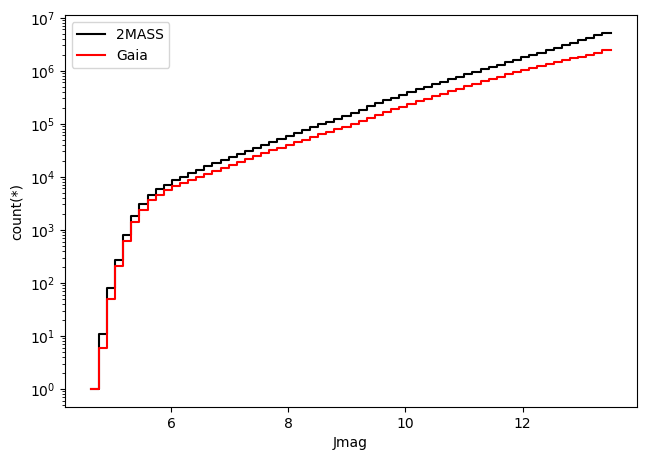

In [9]:
tmass.viz.histogram("Jmag", c='k', label="2MASS")
gaia_raw.viz.histogram("Jmag", c='r', label="Gaia")
plt.legend()
plt.yscale("log")
plt.show()

In [11]:
# partition in J and J-K
eJ = np.linspace(4, 13.5, 51)
eJK = np.linspace(-1, 2, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [12]:
gaiaH, _, _ = np.histogram2d(gaia_raw["JK"].to_numpy(), gaia_raw["Jmag"].to_numpy(), bins=(eJK, eJ))
gaiaH = gaiaH.T
tmassH, _, _ = np.histogram2d(tmass["JK"].to_numpy(), tmass["Jmag"].to_numpy(), bins=(eJK, eJ))
tmassH = tmassH.T
comp = np.nan_to_num(gaiaH/tmassH)
more_than_one = comp > 1
comp[more_than_one] = 1
comp

/tmp/ipykernel_20666/4024758047.py:5: RuntimeWarning: invalid value encountered in divide
  comp = np.nan_to_num(gaiaH/tmassH)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00270421, 0.00172324,
        0.00146612],
       [0.        , 0.        , 0.        , ..., 0.00195258, 0.0018654 ,
        0.00202746],
       [0.        , 0.        , 0.        , ..., 0.00203485, 0.00173083,
        0.00140318]])

In [ ]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

Text(0, 0.5, 'J')

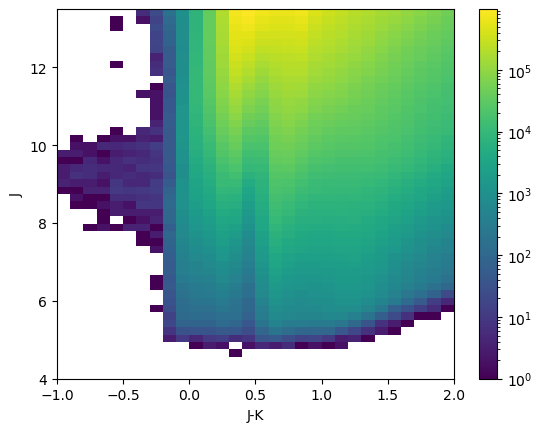

In [18]:
from matplotlib import colors

plt.imshow(tmassH, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto", norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

In [46]:
gaia = gaia_raw[["Jmag", "Kmag", "ra", "dec", "GLON", "GLAT", "rv", "e_rv", "rv_cat", "pmra", "e_pmra", "pmdec", "e_pmdec", "parallax", "e_parallax", "mh", "mh_cat"]]
gaia["JK"] = gaia["Jmag"]-gaia["Kmag"]
gaia["Dist"] = gaia.evaluate("1000/parallax")
gaia["ra"] = gaia["ra"]*np.pi/180
gaia["dec"] = gaia["dec"]*np.pi/180
gaia["GLON"] = gaia["GLON"]*np.pi/180
gaia["GLAT"] = gaia["GLAT"]*np.pi/180
gaia = gaia[gaia.rv.notnan()]
gaia = gaia.extract()
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616
1,12.523,11.93,3.4871678454846704e-05,-1.4801144991951225,5.3109714536296515,-0.5617705516582217,-23.82164764404297,3.2447915077209473,gaia,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,nan,--,0.59299946,1457.3119298261136
2,11.746,10.877,4.9864056729478e-05,-1.4786247210522052,5.3113826194429725,-0.5632175631309735,131.92237854003906,1.274144172668457,gaia,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,nan,--,0.86900043,5610.644003233101
3,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047
4,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"22,465,954",12.294,11.935,6.283017773024687,1.5287053382352704,2.1352443406399906,0.432422424006828,-71.68257904052734,3.913583517074585,gaia,-4.2113278921151975,0.011039289,1.2577584748077586,0.011316809,0.3620062949344702,0.009389001,0.12150000035762787,gspphot,0.35899925,2762.382903261443
"22,465,955",11.903,11.228,6.283031054980294,1.4263507311448658,2.1116464575459695,0.33243280314680107,-14.393659591674805,2.2139320373535156,gaia,5.127952329131903,0.016783616,-1.172331463561274,0.016823703,0.45434838996692956,0.014370571,nan,--,0.6750002,2200.9542062486157
"22,465,956",9.471,8.67,6.2830629246924365,1.4139482644005614,2.1089105368618317,0.3203054854556924,-54.24000549316406,0.2626350522041321,gaia,-4.616426557011018,0.019822646,-0.015870456188812835,0.020180052,1.0655880137082043,0.016312053,-0.05000000074505806,gspspec,0.80099964,938.4489944852508
"22,465,957",13.406,13.128,6.283090012202427,1.5049010718200002,2.1295855677483075,0.4091853215245006,-44.64215850830078,8.348065376281738,gaia,-5.448609975674909,0.018498827,-0.7567577462820062,0.016916338,0.7946582215573009,0.014681197,-0.5390999913215637,gspphot,0.27799988,1258.4026350854188


In [47]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180

C1 = np.sin(delta_G)*np.cos(gaia.dec) - np.cos(delta_G)*np.sin(gaia.dec)*np.cos(gaia.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(gaia.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

gaia["pmlon"] = 1/cosb*(C1*gaia.pmra+C2*gaia.pmdec)
gaia["pmlat"] = 1/cosb*(-1*C2*gaia.pmra+C1*gaia.pmdec)
gaia["e_pmlon"] = 1/cosb*np.sqrt((C1*gaia.e_pmra)**2 + (C2*gaia.e_pmdec)**2)
gaia["e_pmlat"] = 1/cosb*np.sqrt((C2*gaia.e_pmra)**2 + (C1*gaia.e_pmdec)**2)
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626
1,12.523,11.93,3.4871678454846704e-05,-1.4801144991951225,5.3109714536296515,-0.5617705516582217,-23.82164764404297,3.2447915077209473,gaia,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,nan,--,0.59299946,1457.3119298261136,-14.655297882779468,-8.623456733291599,0.015326201107456323,0.01600222294950673
2,11.746,10.877,4.9864056729478e-05,-1.4786247210522052,5.3113826194429725,-0.5632175631309735,131.92237854003906,1.274144172668457,gaia,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,nan,--,0.86900043,5610.644003233101,-5.948794319178558,-0.6170445518400031,0.014608672594441244,0.014418838207860742
3,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031
4,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"22,465,954",12.294,11.935,6.283017773024687,1.5287053382352704,2.1352443406399906,0.432422424006828,-71.68257904052734,3.913583517074585,gaia,-4.2113278921151975,0.011039289,1.2577584748077586,0.011316809,0.3620062949344702,0.009389001,0.12150000035762787,gspphot,0.35899925,2762.382903261443,-3.8351515602548116,2.146823585144634,0.011052674126660568,0.011303736241448347
"22,465,955",11.903,11.228,6.283031054980294,1.4263507311448658,2.1116464575459695,0.33243280314680107,-14.393659591674805,2.2139320373535156,gaia,5.127952329131903,0.016783616,-1.172331463561274,0.016823703,0.45434838996692956,0.014370571,nan,--,0.6750002,2200.9542062486157,4.7681197594245095,-2.221551284596099,0.016785380254973087,0.016821942762645117
"22,465,956",9.471,8.67,6.2830629246924365,1.4139482644005614,2.1089105368618317,0.3203054854556924,-54.24000549316406,0.2626350522041321,gaia,-4.616426557011018,0.019822646,-0.015870456188812835,0.020180052,1.0655880137082043,0.016312053,-0.05000000074505806,gspspec,0.80099964,938.4489944852508,-4.517984419914504,0.9484001313085344,0.019838362526797684,0.020164601871747588
"22,465,957",13.406,13.128,6.283090012202427,1.5049010718200002,2.1295855677483075,0.4091853215245006,-44.64215850830078,8.348065376281738,gaia,-5.448609975674909,0.018498827,-0.7567577462820062,0.016916338,0.7946582215573009,0.014681197,-0.5390999913215637,gspphot,0.27799988,1258.4026350854188,-5.483450758045203,0.43795061100019184,0.01842802322375783,0.016993441538516812


In [48]:
# calculate vertical velocities and their errors
gaia['vb'] = 4.74*gaia["pmlat"]/gaia["parallax"]
gaia["vphi"] = 4.74*gaia["pmlon"]/gaia["parallax"]
gaia["e_vb"] = gaia['vb']*np.sqrt((gaia["e_pmlat"]/gaia["pmlat"])**2 + (gaia["e_parallax"]/gaia["parallax"])**2)
gaia["e_vphi"] = gaia['vphi']*np.sqrt((gaia["e_pmlon"]/gaia["pmlon"])**2 + (gaia["e_parallax"]/gaia["parallax"])**2)

gaia["w"] = gaia["vb"]*np.cos(gaia.GLAT) + gaia["rv"]*np.sin(gaia.GLAT)
gaia["e_w"] = np.sqrt(gaia["e_vb"]**2*np.cos(gaia.GLAT)**2 + gaia["e_rv"]**2*np.sin(gaia.GLAT)**2)
gaia["v_xy"] = gaia["rv"]*np.cos(gaia.GLAT) - gaia["vb"]*np.sin(gaia.GLAT)
gaia["e_v_xy"] = np.sqrt(gaia["e_rv"]**2*np.cos(gaia.GLAT)**2 + gaia["e_vb"]**2*np.sin(gaia.GLAT)**2)
gaia["v"] = gaia["vphi"]*np.sin(gaia.GLON) + gaia["v_xy"]*np.cos(gaia.GLON)
gaia["e_v"] = np.sqrt(gaia["e_vphi"]**2*np.sin(gaia.GLON)**2 + gaia["e_v_xy"]**2*np.cos(gaia.GLON)**2)
gaia["u"] = gaia["vphi"]*np.cos(gaia.GLON) - gaia["v_xy"]*np.sin(gaia.GLON)
gaia["e_u"] = np.sqrt(gaia["e_vphi"]**2*np.cos(gaia.GLON)**2 + gaia["e_v_xy"]**2*np.sin(gaia.GLON)**2)
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001
1,12.523,11.93,3.4871678454846704e-05,-1.4801144991951225,5.3109714536296515,-0.5617705516582217,-23.82164764404297,3.2447915077209473,gaia,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,nan,--,0.59299946,1457.3119298261136,-14.655297882779468,-8.623456733291599,0.015326201107456323,0.01600222294950673,-59.56789461164692,-101.23379368431974,-1.1507258272342007,-1.9494561712539342,-37.723655265826444,1.9839310659795348,-51.891529157718,2.8136914158242585,54.39337627174339,2.2599478968122213,-99.91182312322327,2.570967570938456
2,11.746,10.877,4.9864056729478e-05,-1.4786247210522052,5.3113826194429725,-0.5632175631309735,131.92237854003906,1.274144172668457,gaia,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,nan,--,0.86900043,5610.644003233101,-5.948794319178558,-0.6170445518400031,0.014608672594441244,0.014418838207860742,-16.40996207077157,-158.20492840175635,-1.147230483500163,-10.431309384079315,-84.30992213407522,1.1847945512595885,102.7844241340666,1.239291340372632,188.6130440101424,8.643542346664042,-4.30776559304536,5.969692973187922
3,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745
4,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"22,465,954",12.294,11.935,6.283017773024687,1.5287053382352704,2.1352443406399906,0.432422424006828,-71.68257904052734,3.913583517074585,gaia,-4.2113278921151975,0.011039289,1.2577584748077586,0.011316809,0.3620062949344702,0.009389001,0.12150000035762787,gspphot,0.35899925,2762.382903261443,-3.8351515602548116,2.146823585144634,0.011052674126660568,0.011303736241448347,28.10985315995016,-50.21630466094097,0.7439295967451636,-1.3104266635059645,-4.517691899721864,1.7737166572194571,-76.86446801009292,3.567001038678505,-1.3083417572727,2.206104204731409,91.80474899546982,3.0941588013913095
"22,465,955",11.903,11.228,6.283031054980294,1.4263507311448658,2.1116464575459695,0.33243280314680107,-14.393659591674805,2.2139320373535

In [49]:
df_rv_nan = gaia[gaia.rv.isnan()]
none = len(df_rv_nan)

df_rv = gaia.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
# df_rv.at[0, 'count'] = none
# df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
0,galah,341435
1,apogee,309517
2,rave,32564
3,lamost,446035
4,gaia,21336408


In [53]:
df_mh_nan = gaia[gaia.mh.isnan()]
none = len(df_mh_nan)

df_mh = gaia.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh = df_mh.to_pandas_df()
df_mh.at[0, 'count'] = none
df_mh.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh

,mh_cat,count
2,apogee,217944
3,gspphot,17359464
1,gspspec,1742737
4,rave,9370
0,None,3136444


In [56]:
df_mask = gaia[gaia.mh.notnan()].extract()
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"19,329,510",11.194,10.521,6.282913576868342,1.451733717681735,2.117311761759778,0.3572499915134172,-12.386786460876465,0.8096505403518677,gaia,-2.0668416662533433,0.01691812,0.9886199166728232,0.016981974,0.5959581287784926,0.014461862,0.0763000026345253,gspphot,0.67300034,1677.970232656534,-1.8107382400525718,1.4037203564151914,0.016920987149058896,0.016979118296044475,11.164600612203495,-14.401849464560799,0.3027182050113466,-0.3745012296716146,6.1280414417329085,0.40074535870690525,-15.508961723654206,0.7658821492972904,-4.2438708808005785,0.5106899811300477,20.734770837719292,0.6826583192279869
"19,329,511",13.392,12.805,6.282958327110364,1.4169704067201447,2.109559431852313,0.3232

In [57]:
df_mask["u_LSR"] = df_mask["u"]# - 11.1
df_mask["v_LSR"] = df_mask["v"]# - 12.4
df_mask["w_LSR"] = df_mask["w"] + 7.25


In [58]:
df_mask["f_D"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=16))
df_mask["f_TD"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=35))
df_mask["f_H"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=90))
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001,15.90886540600841,-1.8423986018532164,-11.170380493534385,3.227197428009914e-06,3.351347309617748e-07,2.5630249234599e-09
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745,-67.59341740111921,5.152836667463362,7.985801098979017,4.667102151654633e-07,1.6865716851328825e-07,1.952748420682978e-09
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853,-64.09274872879516,51.60972836175362,21.93605052590047,1.6163985648496891e-09,1.3678409599491008e-08,4.620437809808691e-10
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129,-31.45710218714813,53.0247817400375,16.17145683426625,6.985917821835724e-09,1.922988389915414e-08,4.74637536760348e-10
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606,43.080141279218154,130.3524353187194,-15.534457120158834,5.629651040203901e-18,1.1051916283178151e-11,2.383853373158828e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"19,329,510",11.194,10.521,6.2

In [60]:
df_mask["fTD_fD"] = df_mask["f_TD"]/df_mask["f_D"]
df_mask["fTD_fH"] = df_mask["f_TD"]/df_mask["f_H"]
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001,15.90886540600841,-1.8423986018532164,-11.170380493534385,3.227197428009914e-06,3.351347309617748e-07,2.5630249234599e-09,0.10384698749851175,130.75749981758543
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745,-67.59341740111921,5.152836667463362,7.985801098979017,4.667102151654633e-07,1.6865716851328825e-07,1.952748420682978e-09,0.3613744954210913,86.36912298938131
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853,-64.09274872879516,51.60972836175362,21.93605052590047,1.6163985648496891e-09,1.3678409599491008e-08,4.620437809808691e-10,8.462275268577079,29.604141777329456
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129,-31.45710218714813,53.0247817400375,16.17145683426625,6.985917821835724e-09,1.922988389915414e-08,4.74637536760348e-10,2.752663914689596,40.514882220248026
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606,43.080141279218154,130.3524353187194,-15.534457120158834,5.629651040203901e-18,1.1051916283178151e-11,2.383853373158828e-11,1963161.873489384,0.46361560688329

In [61]:
mh_D = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] < 0.5
D = mh_D & TD_D
df_mask["thin"] = D
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001,15.90886540600841,-1.8423986018532164,-11.170380493534385,3.227197428009914e-06,3.351347309617748e-07,2.5630249234599e-09,0.10384698749851175,130.75749981758543,True
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745,-67.59341740111921,5.152836667463362,7.985801098979017,4.667102151654633e-07,1.6865716851328825e-07,1.952748420682978e-09,0.3613744954210913,86.36912298938131,True
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853,-64.09274872879516,51.60972836175362,21.93605052590047,1.6163985648496891e-09,1.3678409599491008e-08,4.620437809808691e-10,8.462275268577079,29.604141777329456,False
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129,-31.45710218714813,53.0247817400375,16.17145683426625,6.985917821835724e-09,1.922988389915414e-08,4.74637536760348e-10,2.752663914689596,40.514882220248026,True
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606,43.080141279218154,130.3524353187194,-15.534457120158834,5.629651040203901e-18,1.1051916283178151e-11,2.383853373158828e-11,1963161.

In [62]:
mh_TD = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] > 2
TD = mh_TD & TD_D
df_mask["thick"] = TD
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001,15.90886540600841,-1.8423986018532164,-11.170380493534385,3.227197428009914e-06,3.351347309617748e-07,2.5630249234599e-09,0.10384698749851175,130.75749981758543,True,False
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745,-67.59341740111921,5.152836667463362,7.985801098979017,4.667102151654633e-07,1.6865716851328825e-07,1.952748420682978e-09,0.3613744954210913,86.36912298938131,True,False
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853,-64.09274872879516,51.60972836175362,21.93605052590047,1.6163985648496891e-09,1.3678409599491008e-08,4.620437809808691e-10,8.462275268577079,29.604141777329456,False,False
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129,-31.45710218714813,53.0247817400375,16.17145683426625,6.985917821835724e-09,1.922988389915414e-08,4.74637536760348e-10,2.752663914689596,40.514882220248026,True,False
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606,43.080141279218154,130.3524353187194,-15.534457120158834,5.629651040203901e-18,1.1051916283178151e-11,

In [63]:
TD_H = 0.09/0.0015*df_mask["fTD_fH"] < 1
df_mask["halo"] = TD_H
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,12.869,12.374,8.098327729253689e-06,-1.4708391039650315,5.313555374216244,-0.5707847026320089,20.11541748046875,3.3252038955688477,gaia,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,-0.04019999876618385,gspphot,0.49500084,805.5162462635616,2.7546117687254035,-2.3505893871937564,0.017963647317092286,0.015726494626466626,-8.974895834079788,10.517512681002737,-0.1177927204146525,0.1371407546475508,-18.420380493534385,1.7993150186232352,12.07759736535162,2.798807163033172,-1.8423986018532164,1.5870535255858988,15.90886540600841,2.309413395076001,15.90886540600841,-1.8423986018532164,-11.170380493534385,3.227197428009914e-06,3.351347309617748e-07,2.5630249234599e-09,0.10384698749851175,130.75749981758543,True,False,False
1,13.333,12.872,7.072074129081023e-05,-1.4442646160544106,5.3211049578481875,-0.5966022528511015,-43.848968505859375,5.596282482147217,gaia,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,-0.8342000246047974,gspphot,0.46100044,973.1269626186047,-9.295840846043415,-6.263471316398357,0.019632986334417294,0.02009993562995031,-28.89102435530781,-42.878198161931934,-0.505992798195102,-0.7437817538075105,0.7358010989790174,3.1719273462848223,-52.506017979557136,4.638241395367823,5.152836667463362,2.721500544985697,-67.59341740111921,3.8288287141948745,-67.59341740111921,5.152836667463362,7.985801098979017,4.667102151654633e-07,1.6865716851328825e-07,1.952748420682978e-09,0.3613744954210913,86.36912298938131,True,False,False
2,12.605,12.209,0.0001369036265264352,-1.4317217899316605,5.32475341582266,-0.608778787780234,-27.086830139160156,4.7260613441467285,gaia,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,-0.7153000235557556,gspphot,0.3959999,887.3572862984323,-18.79961117236091,-0.23301045458988406,0.016967847277928133,0.018207259490459073,-0.9800591069075668,-79.07254705898264,-0.07753187098227057,-0.979250394844131,14.68605052590047,2.7034224161310307,-22.781062371879106,3.8772637593561075,51.60972836175362,2.3683441203979863,-64.09274872879516,3.222274309054853,-64.09274872879516,51.60972836175362,21.93605052590047,1.6163985648496891e-09,1.3678409599491008e-08,4.620437809808691e-10,8.462275268577079,29.604141777329456,False,False,False
3,13.344,12.95,0.00014746286850100089,-1.5040364706151472,5.304442051756909,-0.5385034448051105,-1.580742359161377,3.5250535011291504,gaia,16.609006659583684,0.018631853,-6.729809571523508,0.018651173,1.3639953276855201,0.015869884,-0.2628999948501587,gspphot,0.39400005,733.1403412479708,-17.713212140564654,2.7187413908677556,0.01863288083092732,0.018650145858960996,9.447858017651745,-61.55492166439022,0.1276080958294217,-0.7191035467174286,8.921456834266252,1.8111461658649304,3.488319865218414,3.0268854583245886,53.0247817400375,1.7914976112513914,-31.45710218714813,2.543556918490129,-31.45710218714813,53.0247817400375,16.17145683426625,6.985917821835724e-09,1.922988389915414e-08,4.74637536760348e-10,2.752663914689596,40.514882220248026,True,False,False
4,12.105,11.477,0.0002136283004441059,-1.486919660121696,5.309080347508753,-0.5551548932613092,104.53910827636719,1.9752477407455444,gaia,4.048141725890486,0.014019745,-3.1535861389250197,0.015813302,0.26478646042533205,0.0116365,-0.036400001496076584,gspphot,0.6279993,3776.6281493157885,-4.67120953388899,2.124231263073825,0.014122843080138267,0.015721294236831038,38.02632570712308,-83.62033751675749,1.6946645603316934,-3.6835269244393976,-22.784457120158834,1.7770625231745396,108.88202385950527,1.9014574405158606,130.3524353187194,3.2289085909649966,43.080141279218154,2.5996269563834606,43.080141279218154,130.3524353187194,-15.534457120158834,5.62965104020390

In [64]:
df_thin = df_mask[df_mask["thin"]].extract()
df_thick = df_mask[df_mask["thick"]].extract()
df_halo = df_mask[df_mask["halo"]].extract()

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)
/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in divide
  result_data = op['op'](a_data, b_data)


In [65]:
intermediate = df_mask["halo"] | df_mask["thick"] | df_mask["thin"]
intermediate = ~intermediate
df_intermediate = df_mask[intermediate].extract()

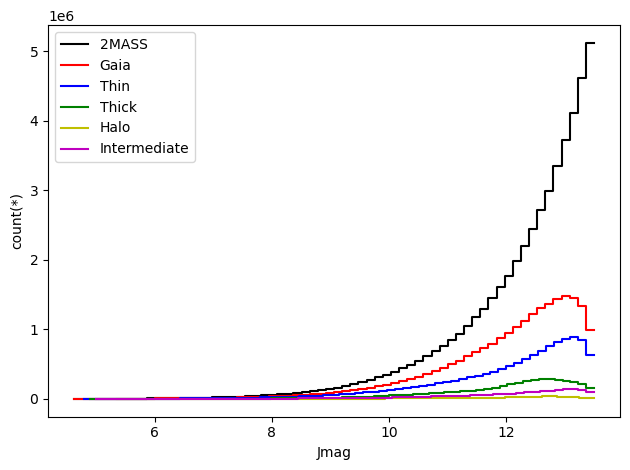

In [66]:
# compare
tmass.viz.histogram("Jmag", c='k', label="2MASS")
gaia.viz.histogram("Jmag", c='r', label="Gaia")
df_thin.viz.histogram("Jmag", c='b', label="Thin")
df_thick.viz.histogram("Jmag", c='g', label="Thick")
df_halo.viz.histogram("Jmag", c='y', label="Halo")
df_intermediate.viz.histogram("Jmag", c='m', label="Intermediate")
plt.legend()
plt.show()

In [67]:
# partition in J and J-K
eJ = np.linspace(4, 13.5, 51)
eJK = np.linspace(-1, 2, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [68]:
gaiaH, _, _ = np.histogram2d(df_thin["JK"].to_numpy(), df_thin["Jmag"].to_numpy(), bins=(eJK, eJ))
gaiaH = gaiaH.T
tmassH, _, _ = np.histogram2d(tmass["JK"].to_numpy(), tmass["Jmag"].to_numpy(), bins=(eJK, eJ))
tmassH = tmassH.T
comp = np.nan_to_num(gaiaH/tmassH)
more_than_one = comp > 1
comp[more_than_one] = 1
comp

/tmp/ipykernel_913/2887078851.py:5: RuntimeWarning: invalid value encountered in divide
  comp = np.nan_to_num(gaiaH/tmassH)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.11349718e-04, 4.00753416e-05, 1.28607439e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.83311794e-05, 5.38097288e-05, 2.30393512e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.74777629e-05, 4.67792487e-05, 2.03359499e-05]])

Text(0, 0.5, 'J')

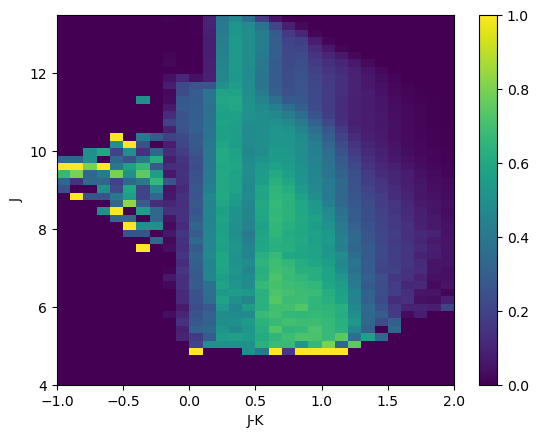

In [69]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

Text(0, 0.5, 'J')

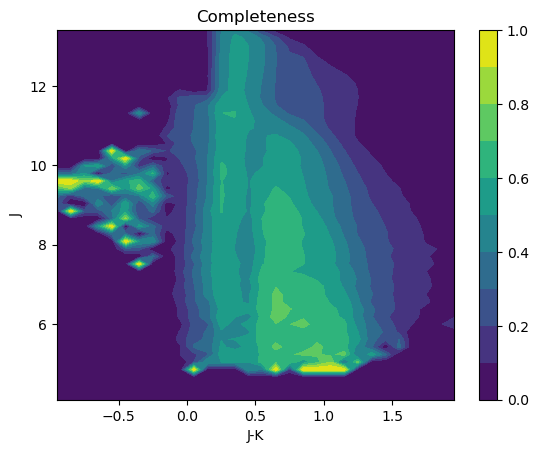

In [70]:
# plot countour tmassH
plt.contourf(JK, J, comp, levels=np.arange(0, 1.1, 0.1), cmap="viridis")
plt.colorbar()
plt.title("Completeness")
plt.xlabel("J-K")
plt.ylabel("J")

In [71]:
df = []
N = len(comp[:, 0])
for i, (jk, jk_low, jk_high) in enumerate(zip( JK, eJK[:-1], eJK[1:])):
    df_new = vaex.from_dict({
        "comp": comp[:, i], 
        "JK": jk*np.ones(N) ,
        "JK_low": jk_low*np.ones(N), 
        "JK_high": jk_high*np.ones(N), 
        "J": J, 
        "J_low": eJ[:-1], 
        "J_high": eJ[1:]
      })
    if len(df) == 0:
        df = df_new
    else:
        df = df.concat(df_new)
df

#,comp,JK,JK_low,JK_high,J,J_low,J_high
0,0.0,-0.95,-1.0,-0.9,4.095000000000001,4.0,4.19
1,0.0,-0.95,-1.0,-0.9,4.285,4.19,4.38
2,0.0,-0.95,-1.0,-0.9,4.475,4.38,4.57
3,0.0,-0.95,-1.0,-0.9,4.665,4.57,4.76
4,0.0,-0.95,-1.0,-0.9,4.855,4.76,4.95
...,...,...,...,...,...,...,...
"1,495",0.0001293577388267253,1.9500000000000002,1.9000000000000004,2.0,12.645,12.55,12.74
"1,496",0.00014586615321780734,1.9500000000000002,1.9000000000000004,2.0,12.835,12.74,12.93
"1,497",0.00012860743865425177,1.9500000000000002,1.9000000000000004,2.0,13.025,12.93,13.120000000000001
"1,498",2.3039351211869873e-05,1.9500000000000002,1.9000000000000004,2.0,13.215,13.120000000000001,13.31


In [78]:
df.export(join(data_dir, "completeness.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.37s =  0.0m =  0.0h
 